<a href="https://colab.research.google.com/github/drcruzm/misdatos/blob/master/Proyecto_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Formación de especialistas en la utilización de datos y recursos tecnológicos de ciencia de datos**

### Proyecto final - 24 de julio de 2020

<br>
<div style="text-align: right; font-size: 1.8rem; font-weight: bold; color: blue; line-height: 1.3;">
    Barrera Canto José Luis<br>
    Cifuentes González Irving Aarón<br>
    Cruz Morales Víctor<br>
    Moreno Alvarado Rodolfo Gilberto
</div>
<br>
<br>

In [ ]:
import gdown
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<br>

## **Etapa 0. Lectura de los datos (incluyendo catálogos)**

En esta parte se procede a leer la base de datos publicada en el **Portal de Datos Abiertos del Gobierno de México** relacionada con los casos asociados al **COVID-19** provocado por el coronavirus **SARS-CoV-2**. Esta información es generada por la **Dirección General de Epidemiología** y está publicada para todo aquel usuario que la requiera, para su acceso, uso, reutilización y redistribución, acorde al decreto publicado en el DOF el 20 de Febrero de 2015.

Se cargan los catálogos correspondientes y se convierten todas las variables a los tipos de datos adecuados aplicando las categorías de cada catálogo.

In [ ]:
# Se leen los datos directamente del sitio web

covid = pd.read_csv('http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip', encoding = 'latin1')

In [ ]:
covid = pd.read_csv('datos_abiertos_covid19.zip', encoding = 'latin1')

In [ ]:
# Se aplican las etiquetas de los catálogos generales (6 variables)

covid.ORIGEN        = pd.Categorical(covid.ORIGEN, 
                                     categories = [1, 2, 99]).rename_categories(
                                                  ['USMER', 'Fuera de USMER', 'No especificado'])

covid.SECTOR        = pd.Categorical(covid.SECTOR, 
                                     categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 99]).rename_categories(
                                                  ['Cruz Roja', 'DIF', 'Estatal', 'IMSS', 'IMSS Bienestar', 'ISSSTE', 
                                                   'Municipal', 'PEMEX', 'Privada', 'SEDENA', 'SEMAR', 'SSA', 
                                                   'Universitario', 'No especificado'])

covid.SEXO          = pd.Categorical(covid.SEXO, 
                                     categories = [1, 2, 99]).rename_categories(
                                                  ['Mujer', 'Hombre', 'No especificado'])

covid.TIPO_PACIENTE = pd.Categorical(covid.TIPO_PACIENTE, 
                                     categories = [1, 2, 99]).rename_categories(
                                                  ['Ambulatorio', 'Hospitalizado', 'No especificado'])

covid.NACIONALIDAD  = pd.Categorical(covid.NACIONALIDAD, 
                                     categories = [1, 2, 99]).rename_categories(
                                                  ['Mexicana', 'Extranjera', 'No especificada'])
    
covid.RESULTADO     = pd.Categorical(covid.RESULTADO, 
                                     categories = [1, 2, 3]).rename_categories(
                                                  ['Positivo SARS-CoV-2', 'No Positivo SARS-CoV-2', 
                                                   'Resultado Pendiente'])

In [ ]:
# Se aplican las etiquetas de los catálogos SÍ/NO (17 variables)

cat_values = [1, 2, 97, 98, 99]
cat_labels = ['Sí', 'No', 'No aplica', 'Se ignora', 'No especificado']

covid.INTUBADO           = pd.Categorical(covid.INTUBADO           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.NEUMONIA           = pd.Categorical(covid.NEUMONIA           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.EMBARAZO           = pd.Categorical(covid.EMBARAZO           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.HABLA_LENGUA_INDIG = pd.Categorical(covid.HABLA_LENGUA_INDIG , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.DIABETES           = pd.Categorical(covid.DIABETES           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.EPOC               = pd.Categorical(covid.EPOC               , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.ASMA               = pd.Categorical(covid.ASMA               , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.INMUSUPR           = pd.Categorical(covid.INMUSUPR           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.HIPERTENSION       = pd.Categorical(covid.HIPERTENSION       , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.OTRA_COM           = pd.Categorical(covid.OTRA_COM           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.CARDIOVASCULAR     = pd.Categorical(covid.CARDIOVASCULAR     , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.OBESIDAD           = pd.Categorical(covid.OBESIDAD           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.RENAL_CRONICA      = pd.Categorical(covid.RENAL_CRONICA      , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.TABAQUISMO         = pd.Categorical(covid.TABAQUISMO         , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.OTRO_CASO          = pd.Categorical(covid.OTRO_CASO          , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.MIGRANTE           = pd.Categorical(covid.MIGRANTE           , 
                                          categories = cat_values).rename_categories(cat_labels)
covid.UCI                = pd.Categorical(covid.UCI                , 
                                          categories = cat_values).rename_categories(cat_labels)

In [ ]:
# Se aplican las conversiones para tipos de datos de tiempo (4 variables)

covid.FECHA_ACTUALIZACION = pd.to_datetime(covid.FECHA_ACTUALIZACION)
covid.FECHA_INGRESO = pd.to_datetime(covid.FECHA_INGRESO)
covid.FECHA_SINTOMAS = pd.to_datetime(covid.FECHA_SINTOMAS)
covid.FECHA_DEF = pd.to_datetime(covid.FECHA_DEF, errors = 'coerce')

In [ ]:
# Se aplican las etiquetas de información geográfica (4 variables)

gdown.download('https://drive.google.com/uc?id=1eHpM76QtHrW2oONQOgnciQBjmUB8uBHv', 'catalogos.xlsx', quiet = False)

catalogo_entidades = pd.read_excel('catalogos.xlsx', 'Catálogo de ENTIDADES')
nombres_entidades = [x.title() for x in catalogo_entidades.ENTIDAD_FEDERATIVA]

catalogo_municipios = pd.read_excel('catalogos.xlsx', 'Catálogo MUNICIPIOS')
catalogo_municipios.MUNICIPIO = [x.title() for x in catalogo_municipios.MUNICIPIO]

covid.MUNICIPIO_RES = pd.Categorical(pd.merge(covid, catalogo_municipios, how='left', 
                                              left_on=['MUNICIPIO_RES','ENTIDAD_RES'], 
                                              right_on=['CLAVE_MUNICIPIO','CLAVE_ENTIDAD']).MUNICIPIO)

covid.ENTIDAD_UM = pd.Categorical(covid.ENTIDAD_UM, 
                                  categories = catalogo_entidades.CLAVE_ENTIDAD).rename_categories(nombres_entidades)

covid.ENTIDAD_NAC = pd.Categorical(covid.ENTIDAD_NAC, 
                                   categories = catalogo_entidades.CLAVE_ENTIDAD).rename_categories(nombres_entidades)

covid.ENTIDAD_RES = pd.Categorical(covid.ENTIDAD_RES, 
                                   categories = catalogo_entidades.CLAVE_ENTIDAD).rename_categories(nombres_entidades)

Downloading...
From: https://drive.google.com/uc?id=1eHpM76QtHrW2oONQOgnciQBjmUB8uBHv
To: /content/catalogos.xlsx
100%|██████████| 81.8k/81.8k [00:00<00:00, 23.9MB/s]


In [ ]:
# Se procesan los encodings de las variables de texto (2 variables)

covid.PAIS_NACIONALIDAD = pd.Categorical(
    [x.encode('raw_unicode_escape').decode('utf-8').title() for x in covid.PAIS_NACIONALIDAD])

covid.PAIS_ORIGEN = pd.Categorical([x.encode('utf-8').decode('utf-8').title() for x in covid.PAIS_ORIGEN])
covid.PAIS_ORIGEN.cat.add_categories('No Aplica', inplace = True)
covid.PAIS_ORIGEN.replace('99', 'No Aplica', inplace = True)
covid.PAIS_ORIGEN.cat.remove_unused_categories(inplace = True)

In [ ]:
# Se establece el índice adecuado (1 variable)

covid.set_index('ID_REGISTRO', inplace = True)

In [ ]:
# Se agregan variables para el análisis (1 variable)

covid['FALLECIDO'] = pd.notnull(covid.FECHA_DEF)

In [ ]:
# Se despliega la estructura del dataframe

covid.info()

In [ ]:
covid.shape

(827951, 35)

In [ ]:
covid.head(3)

<br>

## **Etapa 1. Análisis exploratorio de datos**

En esta parte se procede a describir las características de cada una de las variables del estudio.

#### **Significado y codificación de las variables**

El archivo contiene 35 variables cuyo significado se detalla a continuación:

|No |Nombre             |Descripción                                                                          |Nivel de Medición|
|:-:|-------------------|-------------------------------------------------------------------------------------|----------------:|
|1  |FECHA_ACTUALIZACION|Fecha de la ultima actualizacion de la base de datos.                                |Ordinal          |
|2  |ID_REGISTRO        |Identificador único del caso.                                                        |Nominal          |
|3  |ORIGEN             |Indica el origen del caso para el sistema de vigilancia centinela, si proviene de una Unidad de Salud Monitora de Enfermedades Respiratorias (USMER)|Nominal|                                                              
|4  |SECTOR             |Tipo de institución del Sistema Nacional de Salud que brindó la atención.            |Nominal|
|5  |ENTIDAD_UM         |Entidad donde se ubica la unidad medica que brindó la atención.                      |Nominal|
|6  |SEXO               |Sexo del paciente.                                                                   |Nominal|
|7  |ENTIDAD_NAC        |Entidad de nacimiento del paciente.                                                  |Nominal|
|8  |ENTIDAD_RES        |Entidad de residencia del paciente.                                                  |Nominal|
|9  |MUNICIPIO_RES      |Municipio de residencia del paciente.                                                |Nominal|
|10 |TIPO_PACIENTE      |Tipo de atención recibida por el paciente en la unidad: *ambulatorio* si regresó a su casa, *hospitalizado* si fue ingresado a hospitalización.|Nominal|
|11 |FECHA_INGRESO      |Fecha de ingreso del paciente a la unidad de atención.                               |Ordinal|
|12 |FECHA_SINTOMAS     |Fecha en que inició la sintomatología del paciente.                                  |Ordinal|
|13 |FECHA_DEF          |Fecha en que el paciente falleció.                                                   |Ordinal|
|14 |INTUBADO           |Indica si el paciente requirió de intubación.                                        |Nominal|
|15 |NEUMONIA           |Indica si al paciente se le diagnosticó con neumonía.                                |Nominal|
|16 |EDAD               |Indica la edad del paciente.                                                         |De razón|
|17 |NACIONALIDAD       |Indica si el paciente es mexicano o extranjero.                                      |Nominal|
|18 |EMBARAZO           |Indica si la paciente está embarazada.                                               |Nominal|
|19 |HABLA_LENGUA_INDIG |Indica si el paciente habla lengua índigena.                                         |Nominal|
|20 |DIABETES           |Indica si el paciente tiene un diagnóstico de diabetes.                              |Nominal|
|21 |EPOC               |Indica si el paciente tiene un diagnóstico de EPOC.                                  |Nominal|
|22 |ASMA               |Indica si el paciente tiene un diagnóstico de asma.                                  |Nominal|
|23 |INMUSUPR           |Indica si el paciente presenta inmunosupresión.                                      |Nominal|
|24 |HIPERTENSION       |Indica si el paciente tiene un diagnóstico de hipertensión.                          |Nominal|
|25 |OTRAS_COM          |Indica si el paciente tiene diagnóstico de otras enfermedades.                       |Nominal|
|26 |CARDIOVASCULAR     |Indica si el paciente tiene un diagnóstico de enfermedades cardiovasculares.         |Nominal|
|27 |OBESIDAD           |Indica si el paciente tiene diagnóstico de obesidad.                                 |Nominal|
|28 |RENAL_CRONICA      |Indica si el paciente tiene diagnóstico de insuficiencia renal crónica.              |Nominal|
|29 |TABAQUISMO         |Indica si el paciente tiene hábito de tabaquismo.                                    |Nominal|
|30 |OTRO_CASO          |Indica si el paciente tuvo contacto con algún otro caso diagnósticado con SARS CoV-2.|Nominal|
|31 |RESULTADO          |Resultado del análisis de la muestra reportado por el laboratorio de la Red Nacional de Laboratorios de Vigilancia Epidemiológica (INDRE, LESP y LAVE).|Nominal|
|32 |MIGRANTE           |Indica si el paciente es una persona migrante.                                       |Nominal|
|33 |PAIS_NACIONALIDAD  |Indica la nacionalidad del paciente.                                                 |Nominal|
|34 |PAIS_ORIGEN        |Indica el país del que partió el paciente rumbo a México.                            |Nominal|
|35 |UCI                |Indica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos.         |Nominal|

Las codificaciones correspondientes para cada variables son las siguientes:

|No |Nombre             |Formato / Codificación                             |
|:-:|-------------------|---------------------------------------------------|
|1  |FECHA_ACTUALIZACION|Fecha en formato AAAA-MM-DD                        |
|2  |ID_REGISTRO        |n/a                                                | 
|3  |ORIGEN             |1 - USMER, 2 - Fuera de USMER, 99 - No especificado|
|4  |SECTOR             |1 - Cruz Roja, 2 - DIF, 3 - Estatal, 4 - IMSS, 5 - IMSS Bienestar, 6 - ISSSTE, 7 - Municipal, 8 - PEMEX, 9 - Privada, 10 - SEDENA, 11 - SEMNAR, 12 - SSA, 13 - Universitario, 99 - No especificado|
|5  |ENTIDAD_UM         |Catálogo de entidades federativas en México        |
|6  |SEXO               |1 - Mujer, 2 - Hombre, 99 - No especificado        |
|7  |ENTIDAD_NAC        |Catálogo de entidades federativas en México        |
|8  |ENTIDAD_RES        |Catálogo de entidades federativas en México        |
|9  |MUNICIPIO_RES      |Catálogo de municipios por entidad federativa en México             |
|10 |TIPO_PACIENTE      |1 - Ambulatorio, 2 - Hospitalizado, 99 - No especificado            |
|11 |FECHA_INGRESO      |Fecha en formato AAAA-MM-DD                                         |
|12 |FECHA_SINTOMAS     |Fecha en formato AAAA-MM-DD                                         |
|13 |FECHA_DEF          |Fecha en formato AAAA-MM-DD                                         |
|14 |INTUBADO           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|15 |NEUMONIA           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|16 |EDAD               |n/a                                                                 |
|17 |NACIONALIDAD       |1 - Mexicana, 2 - Extranjera                                        |
|18 |EMBARAZO           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|19 |HABLA_LENGUA_INDIG |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|20 |DIABETES           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|21 |EPOC               |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|22 |ASMA               |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|23 |INMUSUPR           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|24 |HIPERTENSION       |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|25 |OTRAS_COM          |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|26 |CARDIOVASCULAR     |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|27 |OBESIDAD           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|28 |RENAL_CRONICA      |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|29 |TABAQUISMO         |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|30 |OTRO_CASO          |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|31 |RESULTADO          |1 - Positivo SARS-CoV-2, 2 - No positivo SARS-CoV-2, 3 - Resultado Pendiente|
|32 |MIGRANTE           |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|
|33 |PAIS_NACIONALIDAD  |Texto|
|34 |PAIS_ORIGEN        |Texto, 99 - No aplica|
|35 |UCI                |1 - Sí, 2 - No, 97 - No aplica, 98 - Se ignora, 99 - No especificado|



#### **Ámbito del estudio**

El presente estudio se delimitará únicamente a los casos donde **la entidad de residencia es el estado de Yucatán**.


In [ ]:
yucatan = covid[covid.ENTIDAD_RES == 'Yucatán']

In [ ]:
yucatan.shape

(16100, 35)

In [ ]:
yucatan.head(4)

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FALLECIDO
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0fb61f,2020-07-20,Fuera de USMER,IMSS,Yucatán,Hombre,Yucatán,Yucatán,Mérida,Ambulatorio,2020-04-15,2020-04-13,NaT,No aplica,No,30,Mexicana,No aplica,No,No,No,No,No,No,No,No,No,No,No,No especificado,Positivo SARS-CoV-2,No especificado,México,No Aplica,No aplica,False
14df1c,2020-07-20,Fuera de USMER,IMSS,Yucatán,Hombre,Yucatán,Yucatán,Umán,Ambulatorio,2020-04-23,2020-04-22,NaT,No aplica,No,27,Mexicana,No aplica,No,No,No,No,No,No,No,No,No,No,No,No especificado,Positivo SARS-CoV-2,No especificado,México,No Aplica,No aplica,False
0a5f73,2020-07-20,Fuera de USMER,IMSS,Yucatán,Hombre,Yucatán,Yucatán,Mérida,Ambulatorio,2020-04-30,2020-04-27,NaT,No aplica,No,39,Mexicana,No aplica,No,No,No,No,No,No,No,No,No,No,No,No especificado,Positivo SARS-CoV-2,No especificado,México,No Aplica,No aplica,False
132653,2020-07-20,Fuera de USMER,IMSS,Yucatán,Mujer,Yucatán,Yucatán,Mérida,Hospitalizado,2020-05-02,2020-04-25,NaT,No,No,48,Mexicana,No,No,No,No,No,No,No,No,No,No,No,No,No especificado,Positivo SARS-CoV-2,No especificado,México,No Aplica,No,False


<br>

## Etapa 3. Análisis no supervisado - Cluster Analysis

En esta parte se procede a realizar el análisis de los datos a partir de los clusters que es posible formar.
El algoritmo de agrupamiento que se empleará para agrupar variables categóricas será el K-Modes y K-prototypes 

Este algoritmo define los grupos basados en el número de categorías coincidentes entre puntos de datos.
*   El algoritmo k-prototypes : combina k-modes and k-means y es capaz de agrupar datos mixtos numéricos y categóricos.
*   Los algoritmos implemendatos son:

1.   k-modes [HUANG97] [HUANG98]
2.   k-modes con inicializacion basados en densidad [CAO09]
3.   k-prototypes [HUANG97]

El código se basa en los algoritmos de agrupación en scikit-learn y tiene la misma interfaz. 

Emplearemos la aproximación de  Huang, Z .: 
*   Para la agrupación de grandes conjuntos de datos con valores numéricos y categóricos mixtos.

***Proceedings of the First Pacific Asia Knowledge Discovery and Data Mining Conference, Singapore, pp. 21-34, 1997.***

In [ ]:
!pip install kmodes  # Instalacion de la libreria

In [ ]:
from kmodes.kprototypes import KPrototypes  # Llamado de la libreria kprototypes

In [ ]:
yucatan.columns
yucatan.shape

(16100, 35)

In [ ]:
yucatan.drop(['FECHA_ACTUALIZACION','ORIGEN','ENTIDAD_UM','SECTOR','ENTIDAD_NAC','ENTIDAD_RES','TIPO_PACIENTE','FECHA_INGRESO',
                   'FECHA_SINTOMAS','FECHA_DEF','NACIONALIDAD','EMBARAZO','HABLA_LENGUA_INDIG','OTRO_CASO','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN',
                   'INTUBADO','UCI','OTRA_COM','MUNICIPIO_RES'],axis=1, inplace=True)

# Eiminamos las columnas de datos que no seran utilizadas

In [ ]:
yucatan

,SEXO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,FALLECIDO
ID_REGISTRO,,,,,,,,,,,,,,
0fb61f,Hombre,No,30,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
14df1c,Hombre,No,27,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
0a5f73,Hombre,No,39,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
132653,Mujer,No,48,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
05705c,Hombre,No,54,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06d42f,Mujer,No,28,No,No,Sí,No,No,No,No,No,No,Resultado Pendiente,False
0ada01,Hombre,No,52,No,No,No,No,No,No,No,No,No,Resultado Pendiente,False
0e7146,Hombre,No,49,No,No,No,No,No,No,No,No,No,Resultado Pendiente,False


In [ ]:
df = yucatan[yucatan.RESULTADO.eq('Positivo SARS-CoV-2')] # Seleccionamos solo los casos positivos
df = df[df.SEXO.eq('Mujer')]   # Comenzamos haciendo el analisis de cluster solo para mujeres primero
df

,SEXO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,FALLECIDO
ID_REGISTRO,,,,,,,,,,,,,,
132653,Mujer,No,48,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
1a986f,Mujer,No,37,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
1629a8,Mujer,No,37,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
010db3,Mujer,No,37,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
042aeb,Mujer,No,46,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128278,Mujer,No,47,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
09f7ce,Mujer,No,8,No,No,No,No,No,No,No,No,No,Positivo SARS-CoV-2,False
11870b,Mujer,No,37,No,No,Sí,No,Sí,No,Sí,No,No,Positivo SARS-CoV-2,False


In [ ]:
df.drop(['FALLECIDO','RESULTADO','INMUSUPR','SEXO','RENAL_CRONICA'],axis=1, inplace=True) # Se dejan solo las columnas con Comorbilidades para el analisis de clusters

In [ ]:
df # Data frame FINAL solo con Comorbilidades para analisis de clusters

,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,TABAQUISMO
ID_REGISTRO,,,,,,,,,
132653,No,48,No,No,No,No,No,No,No
1a986f,No,37,No,No,No,No,No,No,No
1629a8,No,37,No,No,No,No,No,No,No
010db3,No,37,No,No,No,No,No,No,No
042aeb,No,46,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
128278,No,47,No,No,No,No,No,No,No
09f7ce,No,8,No,No,No,No,No,No,No
11870b,No,37,No,No,Sí,Sí,No,Sí,No


In [ ]:
mark_array = df.values  # Hacemos un arreglo para el analisis
mark_array

array([['No', 48, 'No', ..., 'No', 'No', 'No'],
       ['No', 37, 'No', ..., 'No', 'No', 'No'],
       ['No', 37, 'No', ..., 'No', 'No', 'No'],
       ...,
       ['No', 37, 'No', ..., 'No', 'Sí', 'No'],
       ['No', 36, 'No', ..., 'No', 'Sí', 'No'],
       ['No', 27, 'No', ..., 'No', 'Sí', 'No']], dtype=object)

In [ ]:
mark_array[:, 1] = mark_array[:, 1].astype(float)  # convertimos a variables numericas de punto flotante para el analisis
mark_array

array([['No', 48.0, 'No', ..., 'No', 'No', 'No'],
       ['No', 37.0, 'No', ..., 'No', 'No', 'No'],
       ['No', 37.0, 'No', ..., 'No', 'No', 'No'],
       ...,
       ['No', 37.0, 'No', ..., 'No', 'Sí', 'No'],
       ['No', 36.0, 'No', ..., 'No', 'Sí', 'No'],
       ['No', 27.0, 'No', ..., 'No', 'Sí', 'No']], dtype=object)

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)    # Comenzamos el analisis proponiendo 3 clusters

clusters = kproto.fit_predict(mark_array, categorical=[0, 2, 3, 4, 5,6,7,8])   # Declaramos las variables categoricas y las numericas y arrancamos el analisis 
# con 20 iteraciones maximo

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 824, ncost: 209257.60138282247
Run: 1, iteration: 2/20, moves: 387, ncost: 186193.22479386223
Run: 1, iteration: 3/20, moves: 259, ncost: 177914.82142681626
Run: 1, iteration: 4/20, moves: 151, ncost: 175225.7705279941
Run: 1, iteration: 5/20, moves: 75, ncost: 174568.49657744763
Run: 1, iteration: 6/20, moves: 13, ncost: 174521.44269122218
Run: 1, iteration: 7/20, moves: 0, ncost: 174521.44269122218
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1242, ncost: 299543.4300239218
Run: 2, iteration: 2/20, moves: 549, ncost: 240231.83875797695
Run: 2, iteration: 3/20, moves: 367, ncost: 215739.93805672874
Run: 2, iteration: 4/20, moves: 402, ncost: 193006.0588056011
Run: 2, iteration: 5/20, moves: 329, ncost: 180328.65721072382
Run: 2, iteration: 6/20, moves: 195, ncost: 175930.0073648847
Run: 2, iteration: 7/20, mov

In [ ]:
print(kproto.cluster_centroids_)   # El analisis arrojo 3 clusters y desplegamos sus centroides

[array([[44.19666374],
       [26.57094308],
       [66.85603113]]), array([['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
       ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
       ['No', 'No', 'No', 'No', 'Sí', 'No', 'No', 'No']], dtype='<U2')]


In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)   #Generamos un diccionario con los numeros de clusters asociados a cada elemento

In [ ]:
cluster_dict  # este es el diccionario que se agragara al Data Frame original

In [ ]:
df['cluster']=cluster_dict  # Agragamos la columna que indica el cluster al que pertenece

In [ ]:
df.head(10)  # mostramos el analisis final con los elementos de cluster asociados a los pacientes

,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,TABAQUISMO,cluster
ID_REGISTRO,,,,,,,,,,
132653,No,48,No,No,No,No,No,No,No,0
1a986f,No,37,No,No,No,No,No,No,No,0
1629a8,No,37,No,No,No,No,No,No,No,0
010db3,No,37,No,No,No,No,No,No,No,0
042aeb,No,46,No,No,No,No,No,No,No,0
17d826,No,30,No,No,No,No,No,No,No,1
1d9778,No,45,No,No,No,No,No,No,No,0
15e70b,No,41,No,No,No,Sí,No,Sí,No,0
19e522,Sí,39,Sí,No,No,Sí,No,No,No,0


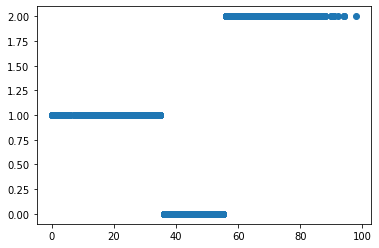

In [ ]:
plt.scatter(df['EDAD'],df['cluster']);  # Graficamos los clusters para observar la separacion producida por la edad

In [ ]:
df[df['cluster']== 1].head(3) # Creamos el 1er cluster

,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,TABAQUISMO,cluster
ID_REGISTRO,,,,,,,,,,
17d826,No,30,No,No,No,No,No,No,No,1
0359db,No,35,No,No,No,No,No,No,No,1
1257fb,No,32,Sí,No,No,No,No,No,Sí,1


In [ ]:
df1 = df[df['cluster']== 1]   # cluster con edades de 23-35

In [ ]:
df1.shape

(1177, 10)

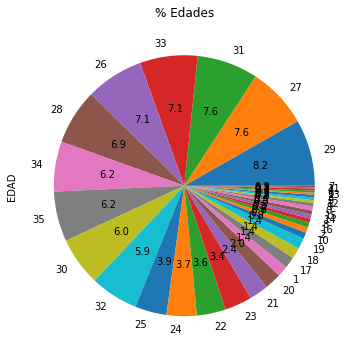

In [ ]:
plot = df1['EDAD'].value_counts().plot(kind='pie', autopct='%.1f', 
                                            figsize=(6, 6),
                                            title='% Edades') # Graficamos por edades el cluster 1 para identificar el rango de edad preponderante

In [ ]:
100 * df1['NEUMONIA'].value_counts() / len(df1['NEUMONIA'])    #Analizamos ahora cada variable categorica asociada a las cormobidades para identificar las caracteristicas del cluster
100 * df1['DIABETES'].value_counts() / len(df1['DIABETES'])
100 * df1['EPOC'].value_counts() / len(df1['EPOC'])
100 * df1['ASMA'].value_counts() / len(df1['ASMA'])
100 * df1['HIPERTENSION'].value_counts() / len(df1['HIPERTENSION'])
100 * df1['CARDIOVASCULAR'].value_counts() / len(df1['CARDIOVASCULAR'])
100 * df1['OBESIDAD'].value_counts() / len(df1['OBESIDAD'])
100 * df1['TABAQUISMO'].value_counts() / len(df1['TABAQUISMO'])

No                 96.516568
Sí                  3.398471
Se ignora           0.084962
No especificado     0.000000
No aplica           0.000000
Name: TABAQUISMO, dtype: float64

In [ ]:
df0 = df[df['cluster']== 0]   # cluster con edades de 36-55  Repetidmos el procedimiento anterior para los otros 2 clusters
df0.head(3)

,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,TABAQUISMO,cluster
ID_REGISTRO,,,,,,,,,,
132653,No,48,No,No,No,No,No,No,No,0
1a986f,No,37,No,No,No,No,No,No,No,0
1629a8,No,37,No,No,No,No,No,No,No,0


In [ ]:
df0.shape

(1139, 10)

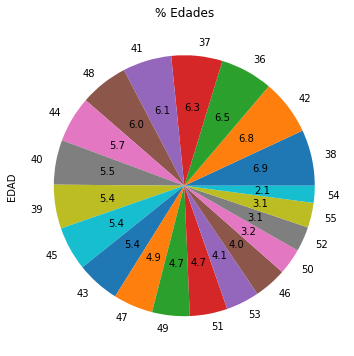

In [ ]:
plot = df0['EDAD'].value_counts().plot(kind='pie', autopct='%.1f', 
                                            figsize=(6, 6),
                                            title='% Edades') 

In [ ]:
100 * df0['NEUMONIA'].value_counts() / len(df0['NEUMONIA']) 
100 * df0['DIABETES'].value_counts() / len(df0['DIABETES'])
100 * df0['EPOC'].value_counts() / len(df0['EPOC'])
100 * df0['ASMA'].value_counts() / len(df0['ASMA'])
100 * df0['HIPERTENSION'].value_counts() / len(df0['HIPERTENSION'])
100 * df0['CARDIOVASCULAR'].value_counts() / len(df0['CARDIOVASCULAR'])
100 * df0['OBESIDAD'].value_counts() / len(df0['OBESIDAD'])
100 * df0['TABAQUISMO'].value_counts() / len(df0['TABAQUISMO'])

No                 97.190518
Sí                  2.546093
Se ignora           0.263389
No especificado     0.000000
No aplica           0.000000
Name: TABAQUISMO, dtype: float64

In [ ]:
df2 = df[df['cluster']== 2]   # cluster con edades de 56-72+
df2.head(3)

In [ ]:
df2.shape

(771, 10)

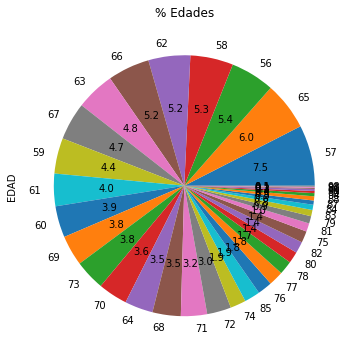

In [ ]:
plot = df2['EDAD'].value_counts().plot(kind='pie', autopct='%.1f', 
                                            figsize=(6, 6),
                                            title='% Edades') 

In [ ]:
100 * df2['NEUMONIA'].value_counts() / len(df2['NEUMONIA']) 
100 * df2['DIABETES'].value_counts() / len(df2['DIABETES'])
100 * df2['EPOC'].value_counts() / len(df2['EPOC'])
100 * df2['ASMA'].value_counts() / len(df2['ASMA'])
100 * df2['HIPERTENSION'].value_counts() / len(df2['HIPERTENSION'])
100 * df2['CARDIOVASCULAR'].value_counts() / len(df2['CARDIOVASCULAR'])
100 * df2['OBESIDAD'].value_counts() / len(df2['OBESIDAD'])
100 * df2['TABAQUISMO'].value_counts() / len(df2['TABAQUISMO'])

No                 97.535668
Sí                  2.075227
Se ignora           0.389105
No especificado     0.000000
No aplica           0.000000
Name: TABAQUISMO, dtype: float64

In [ ]:
pd.crosstab(index=df2['OBESIDAD'], columns=df2['HIPERTENSION'],     # Hacemos una tabla cruzada para analizar efectos combinados
            margins=True).apply(lambda r: r/len(df1) *100, axis=1)

HIPERTENSION,Sí,No,Se ignora,All
OBESIDAD,,,,
Sí,10.365336,7.306712,0.000000,17.672048
No,23.109601,24.468989,0.084962,47.663551
Se ignora,0.000000,0.000000,0.169924,0.169924
All,33.474936,31.775701,0.254885,65.505523


In [ ]:
pd.crosstab(index=df2['OBESIDAD'], columns=df2['NEUMONIA']   # Hacemos una tabla cruzada para analizar efectos combinados en %
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

NEUMONIA,Sí,No
OBESIDAD,,
Sí,40.384615,59.615385
No,30.124777,69.875223
Se ignora,0.000000,100.000000


In [ ]:
plot = pd.crosstab(index=df1['OBESIDAD'],
            columns=df1['NEUMONIA']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# **Se repite todo lo anterios para los HOMBRES**

# **El link de abajo resume los resultados obtenidos**


[Resumen de Resultados](https://docs.google.com/presentation/d/e/2PACX-1vSSSvjJdEaKfwkXIP5DlBtZKHczlDK5xNfT_22YBpDvUKrnf2au8WWJfi0b55-I-1-_3XEi63z1397L/pub?start=true&loop=false&delayms=3000)
